In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv(r"G:\AIT\MLOps\ProjectAnalytics\ml\data\filtered_labeled_dataset.csv")
df.head()

,ph_value,do_value,temp_value,salinity_value,ph_value_filtered,do_value_filtered,temp_value_filtered,salinity_value_filtered,label,status
0,6.7,9.66,28.9,232.6,6.743,9.660,28.9,232.754,0,NaN
1,9.9,9.65,28.9,224.1,7.216,9.659,28.9,231.502,0,NaN
2,9.2,9.65,28.9,230.9,7.642,9.658,28.9,230.320,0,NaN
3,7.5,9.66,28.9,225.8,7.995,9.657,28.9,229.274,0,NaN
4,9.4,9.65,28.9,227.5,8.260,9.656,28.9,228.407,0,NaN


In [39]:
df = df.drop(['status', 'ph_value', 'do_value', 'temp_value', 'salinity_value' ], axis=1)
df.head()

,ph_value_filtered,do_value_filtered,temp_value_filtered,salinity_value_filtered,label
0,6.743,9.660,28.9,232.754,0
1,7.216,9.659,28.9,231.502,0
2,7.642,9.658,28.9,230.320,0
3,7.995,9.657,28.9,229.274,0
4,8.260,9.656,28.9,228.407,0


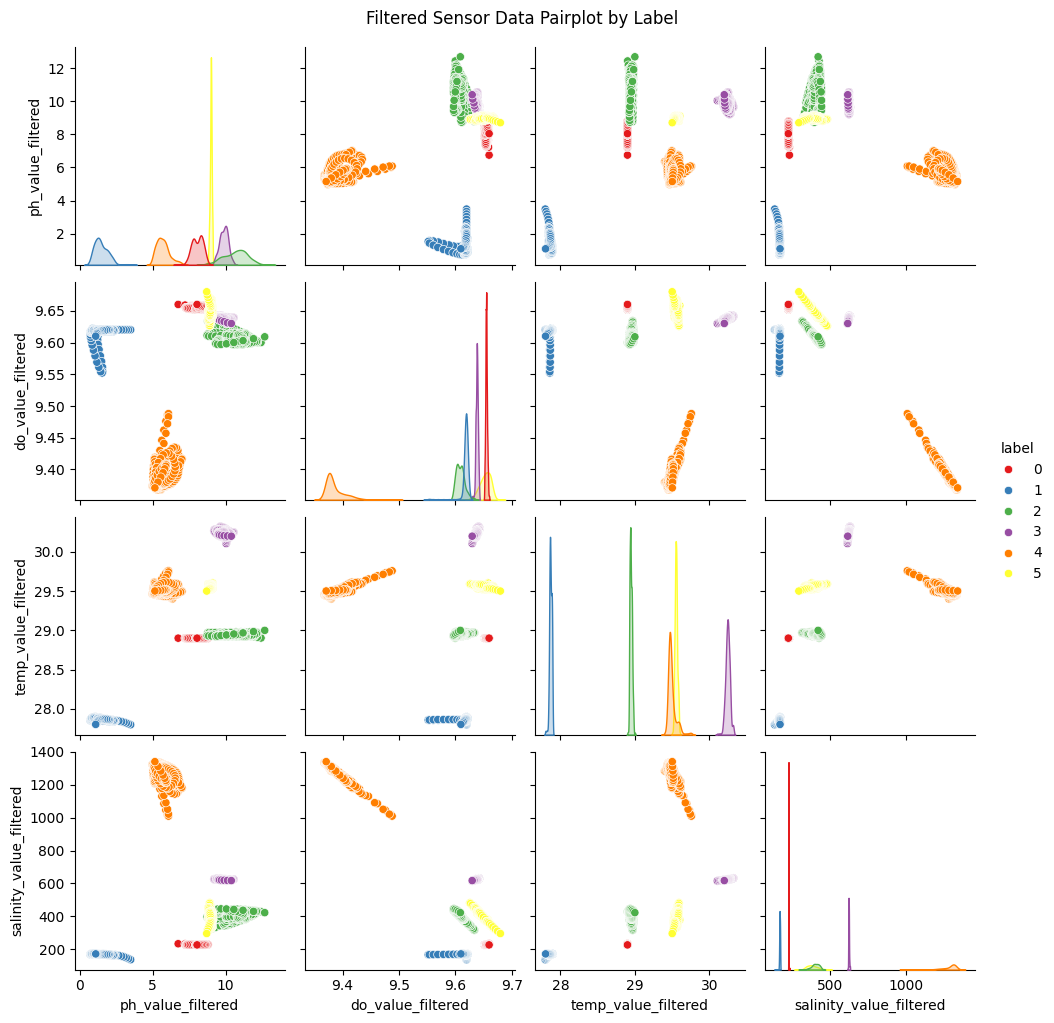

In [40]:
sns.pairplot(df, vars=[
    'ph_value_filtered',
    'do_value_filtered',
    'temp_value_filtered',
    'salinity_value_filtered'
], hue='label', palette='Set1')

plt.suptitle("Filtered Sensor Data Pairplot by Label", y=1.02)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [42]:
class_names = ['Clean', 'Low pH', 'High pH', 'Chemical', 'Salt', 'Organic']

In [43]:
X = df[['ph_value_filtered', 'do_value_filtered', 'temp_value_filtered', 'salinity_value_filtered']]
y = df['label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.859 0.829 0.906 0.937 0.913]
mean : 88.87323943661973


In [48]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        76
           2       0.60      0.81      0.69        63
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        70
           5       0.76      0.52      0.62        71

    accuracy                           0.89       426
   macro avg       0.89      0.89      0.88       426
weighted avg       0.90      0.89      0.89       426

[[70  0  0  0  0  0]
 [ 0 76  0  0  0  0]
 [ 0  0 51  0  0 12]
 [ 0  0  0 76  0  0]
 [ 0  0  0  0 70  0]
 [ 0  0 34  0  0 37]]


Text(0.5, 1.0, 'Confusion Matrix')

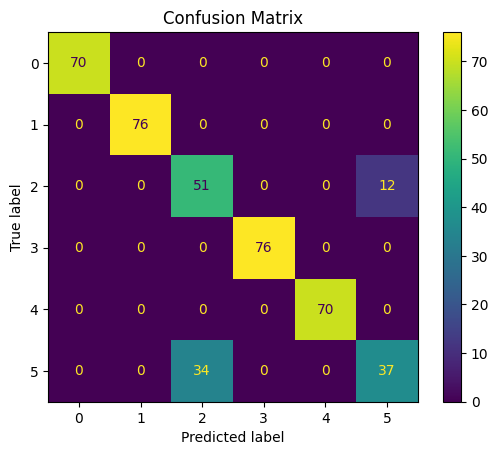

In [49]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")

## PCA

In [50]:
from sklearn.decomposition import PCA

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [51]:
model = SVC()
model.fit(x_train_pca, y_train)

SVC()

In [52]:
cvs = cross_val_score(model, X, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.859 0.829 0.906 0.937 0.913]
mean : 88.87323943661973


In [53]:
y_pred = model.predict(x_test_pca)  # <- use x_test_pca here
print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Clean       1.00      1.00      1.00        70
      Low pH       1.00      1.00      1.00        76
     High pH       0.60      0.79      0.68        63
    Chemical       1.00      1.00      1.00        76
        Salt       1.00      1.00      1.00        70
     Organic       0.74      0.52      0.61        71

    accuracy                           0.89       426
   macro avg       0.89      0.89      0.88       426
weighted avg       0.90      0.89      0.89       426

[[70  0  0  0  0  0]
 [ 0 76  0  0  0  0]
 [ 0  0 50  0  0 13]
 [ 0  0  0 76  0  0]
 [ 0  0  0  0 70  0]
 [ 0  0 34  0  0 37]]


Text(0.5, 1.0, 'Confusion Matrix')

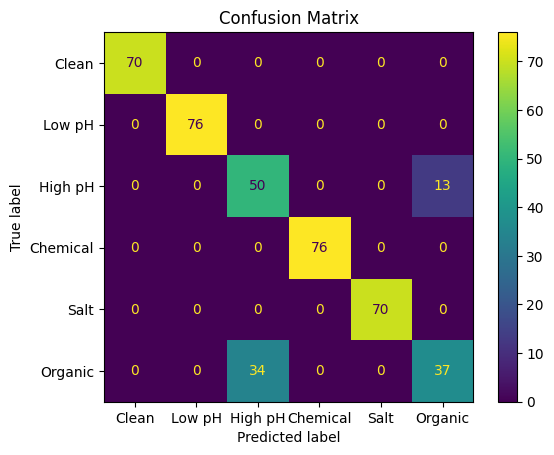

In [54]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title("Confusion Matrix")